<a href="https://colab.research.google.com/github/AdnanSakal/movie_rec/blob/main/Movie_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import os

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "shubhammehta21/movie-lens-small-latest-dataset"

In [ ]:
zip_ref = zipfile.ZipFile("/content/movie-lens-small-latest-dataset.zip")
zip_ref.extractall()
zip_ref.close()

###Collaborative Filtering

In [ ]:
dataset = pd.read_csv("/content/ratings.csv")
dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
new_dataset = dataset.pivot(index = "movieId",columns="userId",values = "rating")

In [ ]:
new_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_dataset = new_dataset.fillna(0)

In [ ]:
new_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_values = new_dataset.to_numpy()

In [ ]:
y_values

array([[4. , 0. , 0. , ..., 2.5, 3. , 5. ],
       [0. , 0. , 0. , ..., 2. , 0. , 0. ],
       [4. , 0. , 0. , ..., 2. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
r_values = (new_dataset>0).to_numpy().astype(int)

In [ ]:
r_values

array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
def cost_func(X, W, b, Y, R, lambda_):
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

In [ ]:
def normalize(y,r):
  y_mean = (np.sum(y*r,axis=1) / (np.sum(r,axis=1)+1e-12)).reshape(-1,1)
  y_norm = y - np.multiply(y_mean,r)
  return y_mean,y_norm

In [ ]:
y_mean,y_norm = normalize(y_values,r_values)

In [ ]:
y_values.shape

(9724, 610)

In [ ]:
w = tf.Variable(tf.random.normal((610,100),dtype = tf.float64),name= "w")
x = tf.Variable(tf.random.normal((9724,100),dtype = tf.float64),name = "x")
b = tf.Variable(tf.random.normal((1,610),dtype = tf.float64),name = "b")

In [ ]:

for i in range(1000):
  with tf.GradientTape() as tape:
    cost_value = cost_func(x,w,b,y_norm,r_values,lambda_ = 1)
  gradient = tape.gradient(cost_value,[x,w,b])
  tf.keras.optimizers.Adam(learning_rate = 1e-1).apply_gradients(zip(gradient,[x,w,b]))
  if i % 20 == 0:
    print(f"at {i} loss {cost_value}")

at 0 loss 5552283.143637735
at 20 loss 311605.2295791715
at 40 loss 244431.70668468715
at 60 loss 202836.45287182156
at 80 loss 165813.38626687424
at 100 loss 130765.04818673362
at 120 loss 99788.3730399814
at 140 loss 72369.89097096969
at 160 loss 52895.563305323005
at 180 loss 41327.89025536138
at 200 loss 35130.26257548166
at 220 loss 31877.31797823267
at 240 loss 29555.737032186313
at 260 loss 27993.785581405755
at 280 loss 26840.047325550135
at 300 loss 25875.046406553272
at 320 loss 25625.401641081113
at 340 loss 25257.308123455754
at 360 loss 25440.382882486923
at 380 loss 25259.16424543037
at 400 loss 23749.70914471223
at 420 loss 24091.877809825546
at 440 loss 23904.98588242547
at 460 loss 23442.7630298644
at 480 loss 23976.27890730272
at 500 loss 22839.252075460336
at 520 loss 23282.238166065275
at 540 loss 23584.671218940228
at 560 loss 22407.6829907088
at 580 loss 22426.695891373645
at 600 loss 23178.34312308907
at 620 loss 21782.299863564564
at 640 loss 24001.819032971303


In [ ]:
preds = np.matmul(x.numpy(),np.transpose(w.numpy())) + b

In [ ]:
output = (preds+np.multiply(y_mean,r_values)).numpy()

In [ ]:
output[output<0] =0

In [ ]:
output

array([[4.4551071 , 0.3568486 , 0.        , ..., 2.41045017, 2.88081324,
        4.89068739],
       [0.09742272, 0.        , 0.57757065, ..., 1.37872471, 0.        ,
        0.        ],
       [4.5513185 , 0.        , 0.        , ..., 1.29450957, 0.09688962,
        0.        ],
       ...,
       [1.24091822, 0.10077237, 0.        , ..., 0.        , 0.02950878,
        0.32968787],
       [1.02393298, 0.30767108, 0.        , ..., 0.        , 0.26852685,
        0.29937033],
       [1.30942263, 0.28530947, 0.        , ..., 0.        , 0.28808826,
        0.66720187]])

In [ ]:
y_values

array([[4. , 0. , 0. , ..., 2.5, 3. , 5. ],
       [0. , 0. , 0. , ..., 2. , 0. , 0. ],
       [4. , 0. , 0. , ..., 2. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

#Content-based Filtering

In [ ]:
dataset_2 = dataset.sample(frac=1)

In [ ]:
dataset_2.userId = pd.Categorical(dataset_2.userId)
dataset_2["new_user_id"] = dataset_2.userId.cat.codes
user_id = dataset_2["new_user_id"].values
dataset_2.movieId = pd.Categorical(dataset_2.movieId)
dataset_2["new_movie_id"] = dataset_2.movieId.cat.codes
movie_id = dataset_2["new_movie_id"].values
rating = dataset_2["rating"].values

In [ ]:
def split(x,y,z):
  train_size =  int(len(z)*0.8)
  train_user = x[:train_size]
  train_movie = y[:train_size]
  train_rating = z[:train_size]

  test_user = x[train_size:]
  test_movie = y[train_size:]
  test_rating = z[train_size:]

  return train_user,test_user,train_movie,test_movie,train_rating,test_rating

In [ ]:
train_user,test_user,train_movie,test_movie,train_rating,test_rating = split(user_id,movie_id,rating)

In [ ]:
user_input = tf.keras.layers.Input(shape=[1,])
movie_input = tf.keras.layers.Input(shape=[1,])
user_embed = tf.keras.layers.Embedding(input_dim = 610,
                                       output_dim = 10
                                       )(user_input)
movie_embed = tf.keras.layers.Embedding(input_dim = 9724,
                                        output_dim = 10
                                        )(movie_input)
user_flatten = tf.keras.layers.Flatten()(user_embed)
movie_flatten = tf.keras.layers.Flatten()(movie_embed)
concate = tf.keras.layers.Concatenate()([user_flatten,movie_flatten])
x = tf.keras.layers.Dense(512,activation = "relu")(concate)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1)(x)

model_0 = tf.keras.Model(inputs =[user_input,
                                  movie_input
                                  ],
                         outputs = output
                         )

model_0.compile(loss = "mse",
                optimizer = tf.keras.optimizers.Adam(0.0001)
                )

his_0 = model_0.fit([train_user,train_movie],train_rating,
                    epochs = 10,
                    validation_data = ([test_user,test_movie],test_rating)
                    )

Epoch 1/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.4262 - val_loss: 0.8279
Epoch 2/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8003 - val_loss: 0.7686
Epoch 3/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7267 - val_loss: 0.7546
Epoch 4/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7038 - val_loss: 0.7531
Epoch 5/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6797 - val_loss: 0.7535
Epoch 6/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6721 - val_loss: 0.7531
Epoch 7/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6549 - val_loss: 0.7521
Epoch 8/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.6543 - val_loss: 0.7561
Epoch 9/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.6392 - val_loss: 0.7522
Epoch 10/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6376 - val_loss: 0.7480


<Axes: >

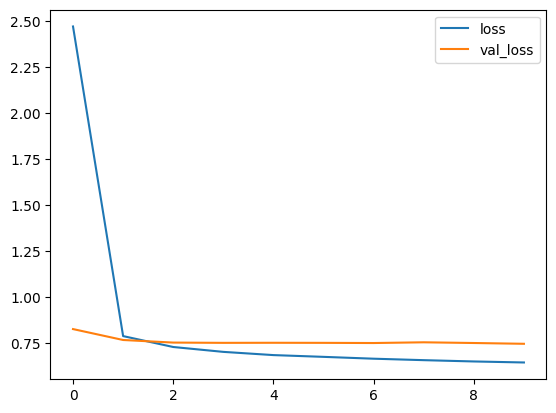

In [ ]:
pd.DataFrame(his_0.history).plot()

In [ ]:
y_pred = model_0.predict([test_user,test_movie])

631/631 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [ ]:
y_pred[:10].T

array([[3.6879427, 2.6948667, 4.068905 , 1.7862988, 3.9106228, 4.3174953,
        4.308583 , 4.0752163, 3.3249555, 4.132441 ]], dtype=float32)

In [ ]:
test_rating[:10]

array([3.5, 2.5, 5. , 3. , 4. , 3. , 2. , 4. , 3. , 4.5])